# Instrument Classification in Carnatic Music (ICCM)
Group 4 - Guillem Gauchia - Àlex Herrero - Gerard San Miguel- Roddie Mc Guinness

# MODELLING

### Import libraries

In [1]:
from random import randint
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### In case you are working from Google Colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

#### In case you are working locally

In [4]:
## ADD THE PATH TO THE FOLDER CONTAINING features.csv and metadata.csv
%cd /Users/Alex/Desktop/MTL/Modelling

C:\Users\Alex\Desktop\MTL\Modelling


### Read and check metadata and features 

In [5]:
features = pd.read_csv("updated_features.csv")
metadata = pd.read_csv("metadata-binary.csv")

column_length = np.shape(features)[0]
row_length = np.shape(features)[1]

In [6]:
print(column_length, row_length)
print(np.shape(metadata))

features.head()


307869 46
(307869, 7)


,Unnamed: 0,BER,Amp_Env_Max,Amp_Env_Min,Amp_Env_Mean,Amp_Env_Var,RMSE_Max,RMSE_Min,RMSE_Mean,ZCR_Max,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,contained_instruments
0,0,0.006061,0.281342,-0.090302,0.088227,0.007371,0.094870,0.051239,0.079648,0.075195,...,-262.741943,-211.880508,-176.290405,-194.258514,-229.249542,-242.852890,-261.000397,-293.160492,-312.861084,0
1,1,0.004512,0.280975,-0.132568,0.082936,0.005619,0.128871,0.059394,0.091771,0.058594,...,-231.262589,-241.532547,-235.469528,-229.440659,-228.119797,-230.106400,-230.142685,-236.071014,-244.865799,0
2,2,0.006468,0.139526,-0.053772,0.023949,0.001886,0.049900,0.031766,0.040711,0.053711,...,-311.401917,-310.222076,-306.932281,-307.787811,-307.819183,-304.487000,-304.433472,-303.542938,-303.353119,0
3,3,0.004367,0.641907,-0.415527,0.026033,0.016076,0.267904,0.015638,0.084500,0.037109,...,-387.289673,-382.094452,-383.803253,-292.073730,-185.873642,-181.555313,-229.269836,-256.295532,-273.903198,0
4,4,0.005356,0.414856,-0.205414,0.079291,0.010331,0.185070,0.070489,0.115049,0.028320,...,-274.246246,-265.589081,-262.506378,-258.595947,-245.133835,-234.815170,-238.894470,-247.143768,-263.482269,0


In [7]:
metadata.head()

,chunk_id,track_id,time_stamp,performance,contains_voice,contains_violin,contains_mridangam
0,0,0_Dorakuna,0.25,Dorakuna,0,0,0
1,1,0_Dorakuna,0.50,Dorakuna,0,0,0
2,2,0_Dorakuna,0.75,Dorakuna,0,0,0
3,3,0_Dorakuna,1.00,Dorakuna,0,0,0
4,4,0_Dorakuna,1.25,Dorakuna,0,0,0


### Split data equally for three different models

In [8]:
X, X_holdout, y_voice, y_holdout = train_test_split(features,
                                   metadata['contains_voice'],
                                   random_state=104,
                                   test_size=0.2,
                                   shuffle=True)

X, X_holdout, y_violin, y_holdout = train_test_split(features,
                                   metadata['contains_violin'],
                                   random_state=104,
                                   test_size=0.2,
                                   shuffle=True)

X, X_holdout, y_mridangam, y_holdout = train_test_split(features,
                                   metadata['contains_mridangam'],
                                   random_state=104,
                                   test_size=0.2,
                                   shuffle=True)

In [9]:
done = []
target = [0,0,0,0,0,0,0,0]

In [10]:
print(np.shape(X))
X_dummy = X
X_dummy.head()

(246295, 46)


,Unnamed: 0,BER,Amp_Env_Max,Amp_Env_Min,Amp_Env_Mean,Amp_Env_Var,RMSE_Max,RMSE_Min,RMSE_Mean,ZCR_Max,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,contained_instruments
121795,121795,0.007606,0.387268,-0.217255,0.087605,0.006364,0.137497,0.051176,0.094753,0.063477,...,-205.957489,-213.910767,-216.751511,-220.390564,-223.834061,-230.571365,-236.064865,-240.327072,-247.379898,7
274445,274445,0.001780,0.054016,-0.007477,0.019107,0.000161,0.020193,0.004705,0.013592,0.128906,...,-371.932709,-365.175598,-356.296539,-353.812042,-353.498871,-354.605530,-360.347839,-364.080933,-370.222626,7
147010,147010,0.007379,0.556610,-0.457825,0.155386,0.031847,0.256646,0.135241,0.197436,0.059082,...,-179.435150,-183.617859,-188.447281,-188.508560,-190.418365,-184.457260,-171.747681,-161.581635,-156.786789,7
94829,94829,0.001955,0.872589,-0.741028,0.091140,0.038084,0.398812,0.053455,0.168657,0.065918,...,-209.277237,-214.402161,-216.554276,-213.663116,-206.398697,-200.712967,-201.726120,-200.513016,-200.009842,7
206260,206260,0.027287,0.413269,-0.242920,0.058384,0.007512,0.164167,0.049059,0.095263,0.031250,...,-295.485535,-298.509460,-306.742493,-312.631378,-312.983948,-316.473816,-318.483032,-326.753448,-338.614532,1


In [11]:
#y_mridangam = y_mridangam.values
y_voice = y_voice.to_numpy()
y_violin = y_violin.to_numpy()
y_mridangam = y_mridangam.to_numpy()

In [12]:
X_dummy = X.values
X_dummy = X.drop(columns = ['Unnamed: 0'])

done = []
target = [0, 0, 0, 0, 0, 0, 0, 0]

X_dummy = X_dummy.to_numpy()

index = []
num_samples = 246290
max_train_target = 12000
max_target = 4000

for i in range(num_samples):
  index.append(i)
#print(index)

X_aux = []
y_violin_aux = []
y_voice_aux = []
y_mridangam_aux = []

contador = 0

while target != [max_target,max_target,max_target,max_target,max_target,max_target,max_target,max_target] and contador < num_samples: #we have no idea how it's getting 1000 of each, there's only 176 mridangams in the total csv (including holdout and everything).
  sample_index = randint(0, len(index)-1)
  contador += 1
  if target[int(X_dummy[index[sample_index]][44])] < max_target:
    target[int(X_dummy[index[sample_index], 44])] += 1

    # print(len(index))

    X_aux.append(X_dummy[index[sample_index]])
    y_violin_aux.append(y_violin[index[sample_index]])
    y_voice_aux.append(y_voice[index[sample_index]])
    y_mridangam_aux.append(y_mridangam[index[sample_index]])
    del index[sample_index]



print("Sample Distribution: ")
print(target)



Sample Distribution: 
[4000, 4000, 4000, 2583, 4000, 4000, 4000, 4000]


In [13]:
X_aux = np.delete(X_aux, 44, 1) #Eliminar categoria al final

In [14]:
print(X_aux)
print(np.shape(y_violin_aux))

[[ 2.28048419e-03  4.50439453e-01 -1.77429199e-01 ... -2.85342712e+02
  -2.93774353e+02 -3.02316284e+02]
 [ 6.10563764e-03  6.26403809e-01 -4.66705322e-01 ... -1.63360153e+02
  -1.66225616e+02 -1.62368027e+02]
 [ 6.64179400e-03  5.23132324e-01 -3.05328369e-01 ... -9.86073456e+01
  -9.33525162e+01 -1.11954544e+02]
 ...
 [ 4.97696223e-03  2.28027344e-01 -1.03912354e-01 ... -2.99482544e+02
  -3.03449371e+02 -3.04643494e+02]
 [ 8.50995537e-04  2.16308594e-01 -1.14013672e-01 ... -2.57222382e+02
  -2.70091736e+02 -2.59054626e+02]
 [ 6.54288940e-03  7.64465332e-01 -3.70391846e-01 ... -1.09310295e+02
  -1.15163887e+02 -1.27690239e+02]]
(30583,)


### Percentage of ones in each instrument model

In [15]:
print("Percentage of ones in voice: ")
print(sum(y_voice_aux)/len(y_voice_aux)) # percentage of ones for voice
print("Percentage of ones in voice at training set: ")
print(sum(y_voice_aux[:max_train_target])/len(y_voice_aux[:max_train_target]))
#print(sum(y_voice_aux[max_train_target:])/len(y_voice_aux[max_train_target:]))

Percentage of ones in voice: 
0.5231664650295916
Percentage of ones in voice at training set: 
0.6693333333333333


In [16]:
print("Percentage of ones in violin at training: ")
print(sum(y_violin_aux)/len(y_violin_aux)) # percentage of ones for violin
print("Percentage of ones in violin at training set: ")
print(sum(y_violin_aux[:max_train_target])/len(y_violin_aux[:max_train_target]))
#print(sum(y_violin_aux[max_train_target:])/len(y_violin_aux[max_train_target:]))

Percentage of ones in violin at training: 
0.5231664650295916
Percentage of ones in violin at training set: 
0.7396666666666667


In [17]:
print("Percentage of ones in mridangam: ")
print(sum(y_mridangam_aux)/len(y_mridangam_aux)) # percentage of ones for mridangam
print("Percentage of ones in mridangam at training set: ")
print(sum(y_mridangam_aux[:max_train_target])/len(y_mridangam_aux[:max_train_target]))
#print(sum(y_mridangam_aux[max_train_target:])/len(y_mridangam_aux[max_train_target:]))

Percentage of ones in mridangam: 
0.4768335349704084
Percentage of ones in mridangam at training set: 
0.4545


### Find best parameters

In [18]:
X_train, X_test = X_aux[:max_train_target], X_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)
y_train, y_test = y_violin_aux[:max_train_target], y_violin_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)

In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,],
    "max_depth":[1,3,7],
    "learning_rate":[0.01,0.1]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train , y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

### Get Scores for the three models

In [21]:
# Creating the model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test = X_aux[:max_train_target], X_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)
y_train, y_test = y_voice_aux[:max_train_target], y_voice_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)

In [22]:
clf_voice = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score for voice model: ")
print(clf_voice.score(X_test, y_test))

Score for voice model: 
0.42877899155141797


In [23]:
X_train, X_test = X_aux[:max_train_target], X_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)
y_train, y_test = y_violin_aux[:max_train_target], y_violin_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)

In [24]:
clf_violin = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score for violin model: ")
print(clf_violin.score(X_test, y_test))

Score for violin model: 
0.3836301996448367


In [25]:
X_train, X_test = X_aux[:max_train_target], X_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)
y_train, y_test = y_mridangam_aux[:max_train_target], y_mridangam_aux[max_train_target:] #CON SELECCIÓN DE DATA (AUX)

In [26]:
clf_mridangam = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score for mridangam model: ")
print(clf_mridangam.score(X_test, y_test))

Score for mridangam model: 
0.5082602378518001


### Summarize Predictions

In [27]:
# summarize prediction
for i in range(200):
    yhat = clf_voice.predict([X_test[i]])
    #print(X_test[i])
    print('Prediction that contains voice: %d' % yhat[0])

Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction that contains voice: 1
Prediction tha

In [28]:
# summarize prediction
for i in range(200):
    yhat = clf_violin.predict([X_test[i]])
    #print(X_test[i])
    print('Prediction that contains violin: %d' % yhat[0])

Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that contains violin: 1
Prediction that cont

In [29]:
# summarize prediction
for i in range(100):
    yhat = clf_mridangam.predict([X_test[i]])
    #print(X_test[i])
    print('Prediction that contains mridangam: %d' % yhat[0])

Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction that contains mridangam: 0
Prediction t

### Locate Instruments in a track with trained models

In [47]:
song = features[6000:8000]
updated_song = song.drop(columns = ['Unnamed: 0'])
updated_song = updated_song.to_numpy()
updated_song = np.delete(updated_song, 44, 1) #Eliminar categoria al final
updated_song

array([[ 3.62730771e-03,  3.76098633e-01, -2.03155518e-01, ...,
        -2.27162155e+02, -2.27200134e+02, -2.34010666e+02],
       [ 2.50996579e-03,  1.58538818e-01, -5.29785156e-02, ...,
        -3.12359314e+02, -3.21419159e+02, -3.18066101e+02],
       [ 6.75267773e-03,  4.57122803e-01, -5.60607910e-02, ...,
        -3.00352356e+02, -3.04876434e+02, -3.09806152e+02],
       ...,
       [ 2.02402985e-03,  2.38128662e-01, -1.69067383e-02, ...,
        -2.85286713e+02, -2.85743347e+02, -2.91295929e+02],
       [ 4.98696347e-04,  1.71447754e-01, -8.16650391e-02, ...,
        -3.24490204e+02, -3.26061432e+02, -3.27536469e+02],
       [ 5.77097805e-03,  3.71276855e-01, -1.03302002e-01, ...,
        -1.81194214e+02, -1.79863724e+02, -1.84329361e+02]])

In [48]:
song_length = len(updated_song)

In [49]:
# Create empty arrays
yhat_vo = np.zeros(song_length)
yhat_vi = np.zeros(song_length)
yhat_mr = np.zeros(song_length)

# Sample arrays (replace with your own data)
for i in range(song_length):
    yhat_vo[i] = clf_voice.predict([updated_song[i]])
    yhat_vi[i] = clf_violin.predict([updated_song[i]])
    yhat_mr[i] = clf_mridangam.predict([updated_song[i]])

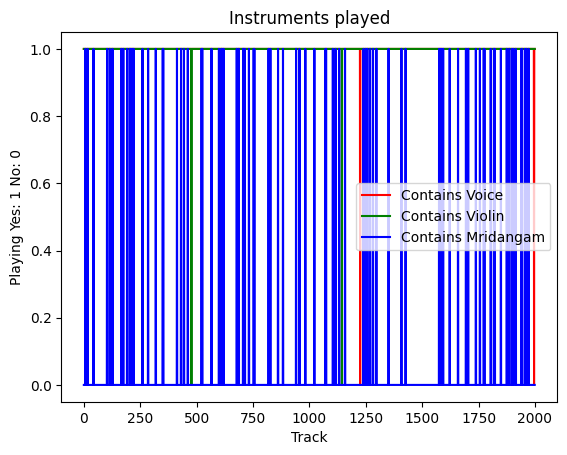

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-axis values
x = range(len(yhat_vo))

# Plot the arrays
plt.plot(x, yhat_vo, color='red', label='Contains Voice')
plt.plot(x, yhat_vi, color='green', label='Contains Violin')
plt.plot(x, yhat_mr, color='blue', label='Contains Mridangam')

# Set plot labels and title
plt.xlabel('Track')
plt.ylabel('Playing Yes: 1 No: 0')
plt.title('Instruments played')

# Show legend
plt.legend()

# Display the plot
plt.show()